##### Nilesh Sharma 2018MSCS003 Lab 07 CLARA algorithm for clustering

In [1]:
import pandas as pd
import numpy as np
import csv
import math
import random
import matplotlib.pyplot as plt

In [2]:
data=[[12, 39],[20, 36],[28, 30],[18, 52],[29, 54],[33, 46],[24, 55],[45, 59],[45, 63],[52, 74],[16, 49],[22, 33],[24, 35],[17, 51],[19, 52],[31, 45],[25, 58],[34, 52],[42, 61],[50, 75]]

In [3]:
X=[]
Y=[]
for i in data:
    X.append(i[0])
    Y.append(i[1])

In [4]:
#intial points selection
def inical(k,data):
    inipoints=[]
    for i in range(k):
        randp=random.choice(data)
        inipoints.append(randp)
    return inipoints

In [5]:
def distcal(data,inipoints):
    d=[]
    for i in data:
        d2=[]
        for j in inipoints:
            dis= abs(i[0]-j[0]) + abs(i[1]-j[1])
            d2.append(dis)
        d.append(d2)
    return d

In [6]:
def indexcal(d):
    ind=[]
    for i in d:
        ind.append(i.index(min(i)))
    return ind

In [7]:
def costcal(d):
    summ=0
    for i in d:
        summ+=min(i)
    return summ

In [8]:
k=3
inte=50

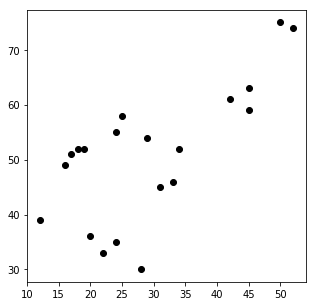

In [9]:
fig =plt.figure(figsize=(5,5))
plt.scatter(X,Y,color='black')
plt.show()

In [10]:
def kmediods(k,data,inte):
    inipoints=inical(k,data)
    d= distcal(data,inipoints)
    cost=costcal(d)
    cent=inipoints.copy()
    for inter in range(inte):
        centnew = cent.copy()

        ipr = random.choice(centnew)
        randp=random.choice(data)
        for i in range(len(centnew)):
            if centnew[i]==ipr:
                centnew[i]=randp

        dnew=distcal(data,centnew)
        costnew= costcal(dnew)

        if costnew-cost<0:
            cost=costnew
            cent=centnew.copy()

    return cent,cost


In [11]:
def clara(k,sam,data,inte):
    costs=[]
    indexs=[]
    for i in range(10):
        randpoints=[]
        for i in range(sam):
            randp=random.choice(data)
            if randp not in randpoints:
                randpoints.append(randp)

        index1,cost= kmediods(k,randpoints,inte)
        costs.append(cost)
        indexs.append(index1)

    mincost=min(costs)
    cos = costs.index(mincost)
    inde= indexs[cos]
    d= distcal(data,inde)
    ind= indexcal(d)
    print(ind)
    return ind

[1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2]


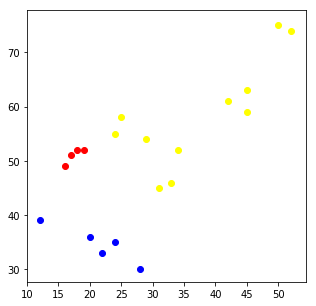

In [12]:
ind = clara(3,15,data,50)
fig =plt.figure(figsize=(5,5))
col={0:'red',1:'blue',2:'yellow',3:'green',4:'cyan'}

for i in range(len(data)):
    plt.scatter(data[i][0],data[i][1],color=col[ind[i]])

plt.show()